In [2]:
import streamlit as st
import pandas as pd
import streamlit_pandas as sp
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight',)

from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
def load_data(file):
        df = pd.read_csv(file)
        return df

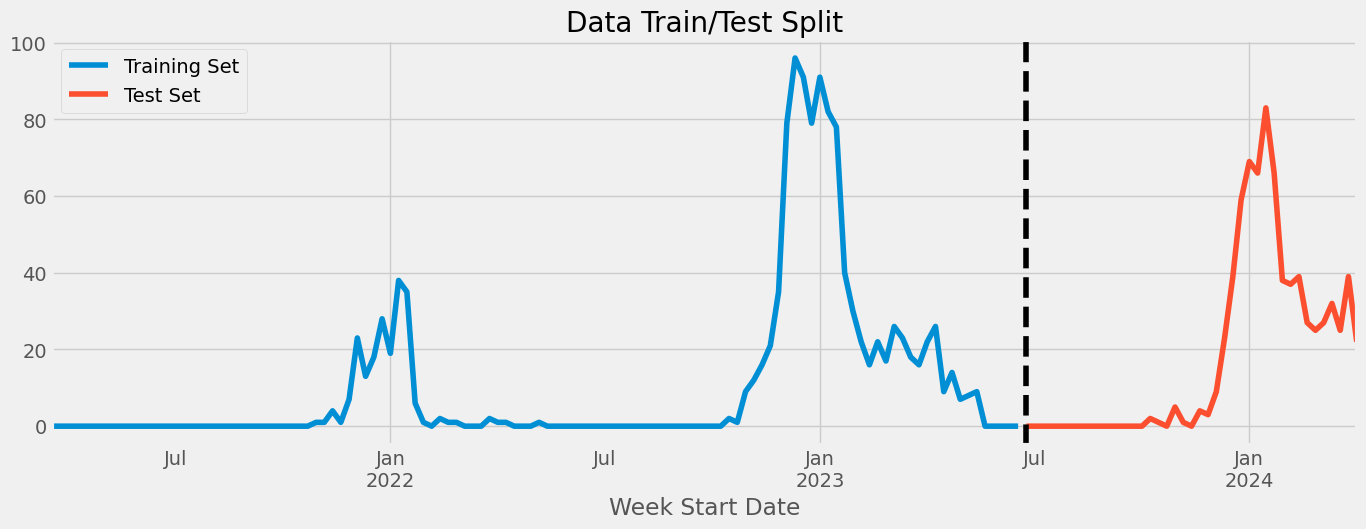

In [6]:
file1 = r"C:\Users\hacio\OneDrive\Desktop\Project\Needed\No Anomaly\2021_2024.csv"
df1 = load_data(file1)

st.header("Forecasting Using XGBOOST")
dataset = ["Week Start Date","Positive"]
df1= df1[dataset]
df1=df1.set_index("Week Start Date")
df1.index=pd.to_datetime(df1.index, format='%d/%m/%Y')
train = df1.loc[df1.index < "06-26-2023"]
test = df1.loc[df1.index >= "06-26-2023"]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('06-26-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])




In [3]:
file = r"C:\Users\hacio\OneDrive\Desktop\Project\Needed\No Anomaly\2021_2024.csv"
df = load_data(file)
df.tail()

,ID,Year,Week,Week Start Date,Week End Date,Positive
154,61,2024,10,4/3/2024,10/3/2024,27
155,62,2024,11,11/3/2024,17/3/2024,32
156,63,2024,12,18/3/2024,24/3/2024,25
157,64,2024,13,25/3/2024,31/3/2024,39
158,65,2024,14,1/4/2024,7/4/2024,22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               159 non-null    int64 
 1   Year             159 non-null    int64 
 2   Week             159 non-null    int64 
 3   Week Start Date  159 non-null    object
 4   Week End Date    159 non-null    object
 5   Positive         159 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.6+ KB


In [30]:
file1 = r"C:\Users\hacio\OneDrive\Desktop\Project\Needed\No Anomaly\2015_2020.csv"
df1 = load_data(file1)
df1.tail()

,ID,Year,Week,Week Start Date,Week End Date,Positive
228,228,2020,7,10/2/2020,16/02/2020,55
229,229,2020,8,17/02/2020,23/02/2020,51
230,230,2020,9,24/02/2020,1/3/2020,37
231,231,2020,10,2/3/2020,8/3/2020,0
232,232,2020,11,9/3/2020,16/03/2020,0


In [31]:
dataset = ["Week Start Date","Positive"]
df1= df1[dataset]
df1["Week Start Date"]=pd.to_datetime(df1["Week Start Date"])
df1=df1.set_index("Week Start Date")
df1.index=pd.to_datetime(df1.index, format='%d/%m/%Y')
df1.tail()

,Positive
Week Start Date,
2020-10-02,55
2020-02-17,51
2020-02-24,37
2020-02-03,0
2020-09-03,0


In [32]:
## Plot train and test so you can see where we have split
split_date = '04-02-2019'
df_train =df1.loc[df1.index <= split_date].copy()
df_test = df1.loc[df1.index > split_date].copy()

In [33]:
df_train_prophet = df_train.reset_index() \
.rename(columns={'Week Start Date':'ds',
                 'Positive':'y'})

df_train_prophet

,ds,y
0,2015-09-28,0
1,2015-05-10,0
2,2015-12-10,1
3,2015-10-19,0
4,2015-10-26,1
...,...,...
179,2019-01-04,15
180,2019-03-06,0
181,2019-01-07,8
182,2019-02-09,0


In [34]:
model = Prophet()
model.fit(df_train_prophet)

13:48:37 - cmdstanpy - INFO - Chain [1] start processing
13:48:37 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
df_test_prophet = df_test.reset_index() \
.rename(columns={'Week Start Date':'ds',
                 'Positive':'y'})
df_test_prophet.tail()

,ds,y
44,2020-10-02,55
45,2020-02-17,51
46,2020-02-24,37
47,2020-02-03,0
48,2020-09-03,0


In [36]:
df_test_fcst = model.predict(df_test_prophet)
df_test_fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44,2020-02-24,17.125121,-4.228975,46.542186,17.125103,17.125139,3.488240,3.488240,3.488240,-0.580921,-0.580921,-0.580921,4.069160,4.069160,4.069160,0.0,0.0,0.0,20.613361
45,2020-03-02,17.139815,-1.483850,49.982255,17.139797,17.139834,5.576251,5.576251,5.576251,-0.580921,-0.580921,-0.580921,6.157171,6.157171,6.157171,0.0,0.0,0.0,22.716066
46,2020-06-01,17.330839,-21.622113,30.926997,17.330820,17.330858,-13.449190,-13.449190,-13.449190,-0.580921,-0.580921,-0.580921,-12.868269,-12.868269,-12.868269,0.0,0.0,0.0,3.881649
47,2020-09-03,17.528160,-25.582357,26.114411,17.528140,17.528179,-18.281146,-18.281146,-18.281146,-12.539331,-12.539331,-12.539331,-5.741816,-5.741816,-5.741816,0.0,0.0,0.0,-0.752986
48,2020-10-02,17.589036,-13.730233,39.156969,17.589015,17.589056,-6.687197,-6.687197,-6.687197,3.315527,3.315527,3.315527,-10.002724,-10.002724,-10.002724,0.0,0.0,0.0,10.901839


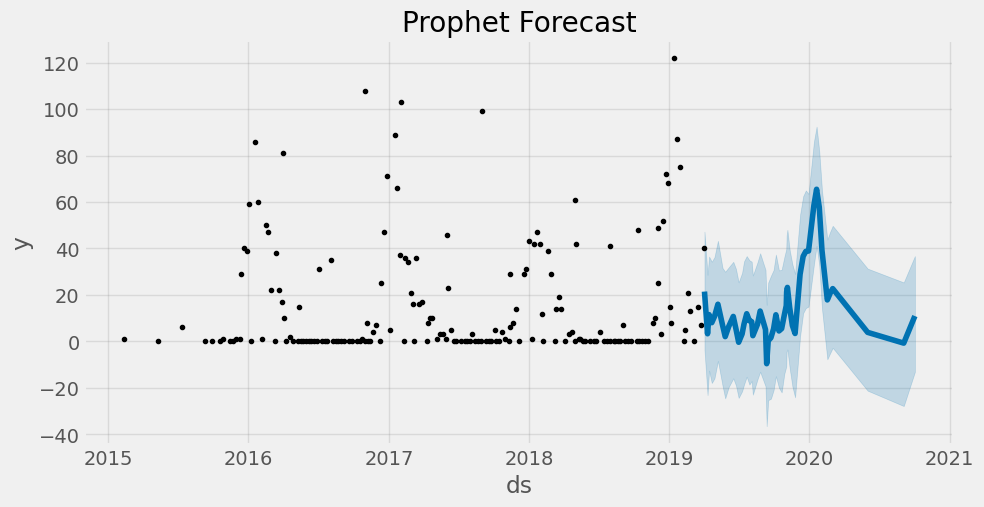

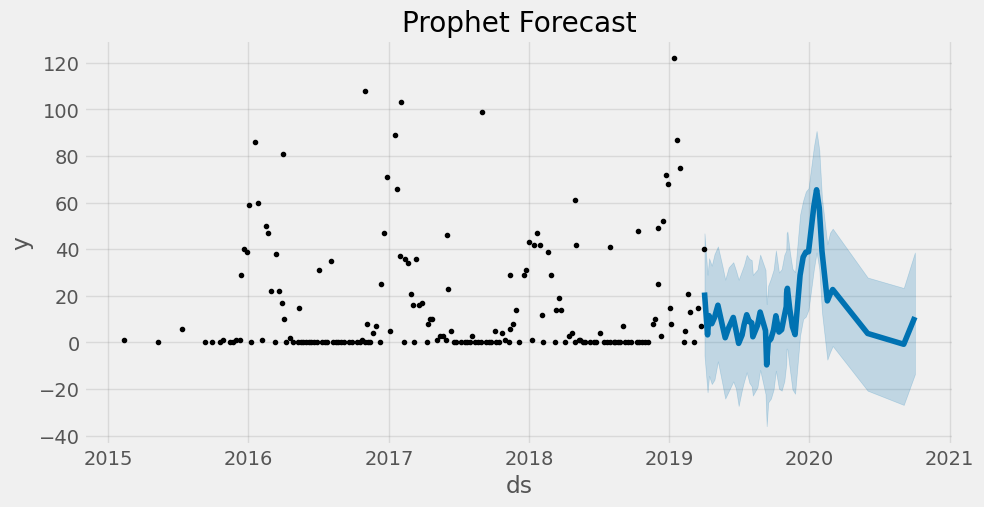

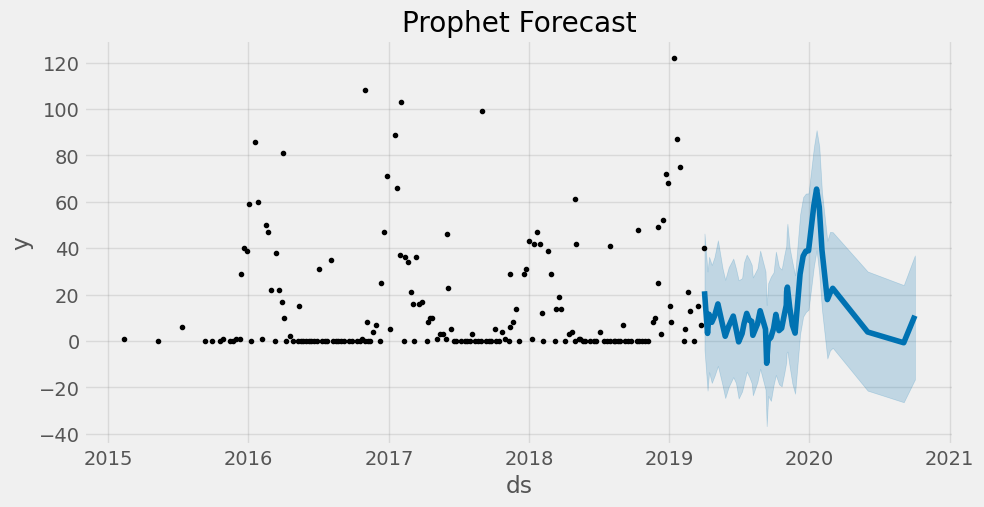

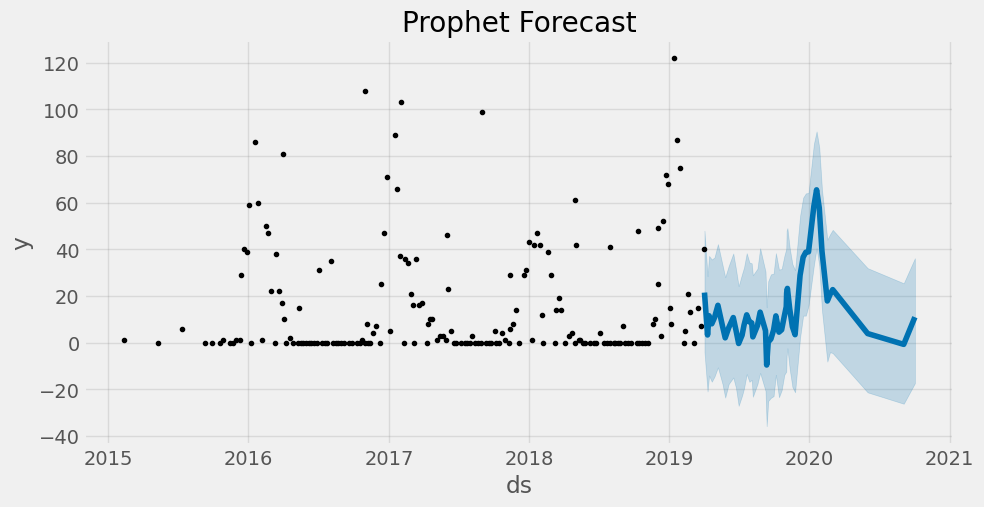

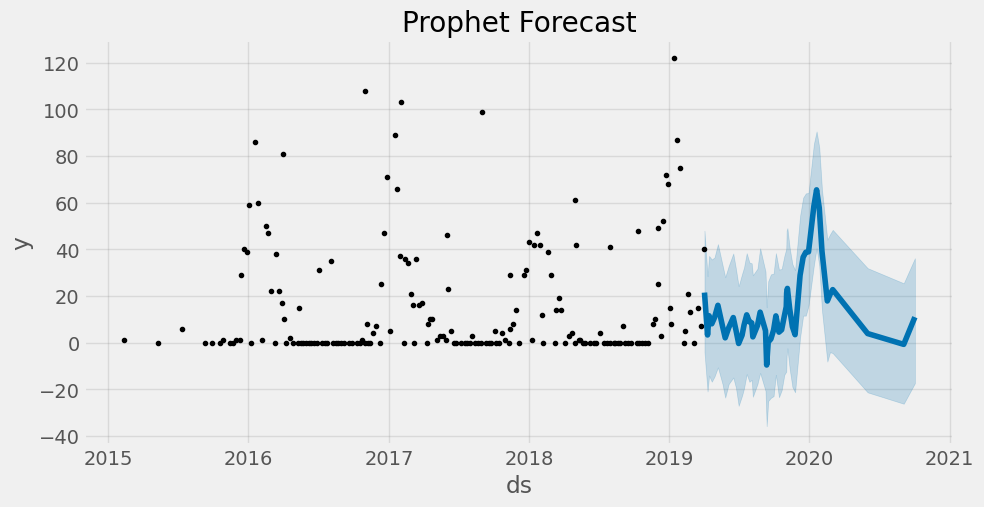

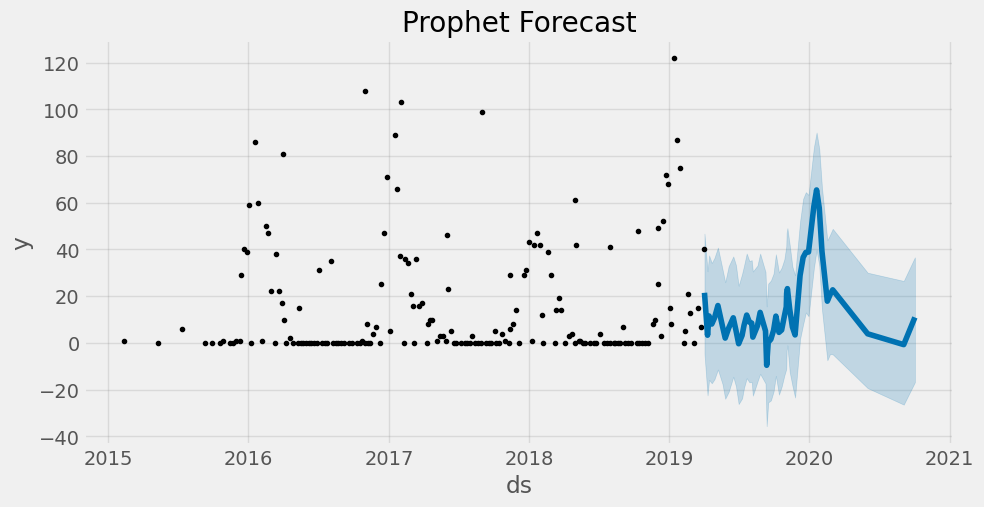

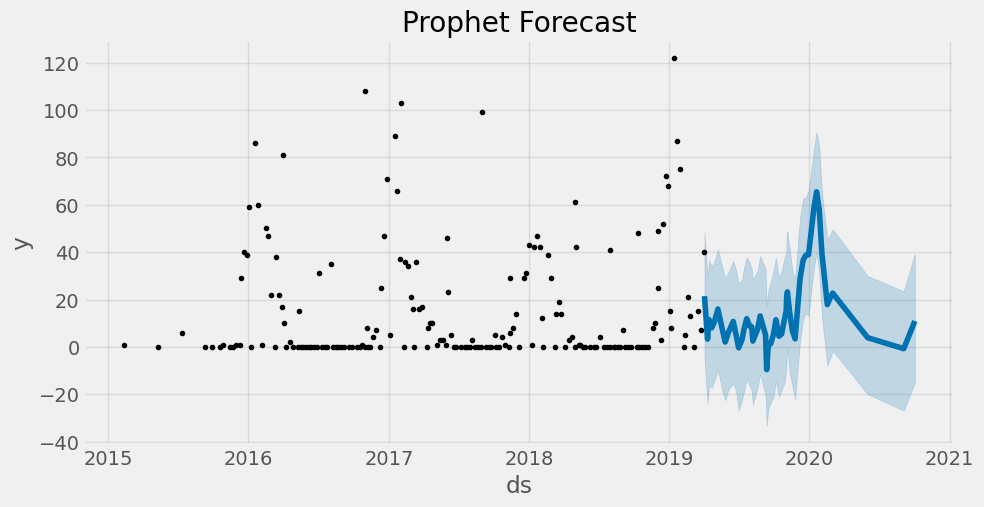

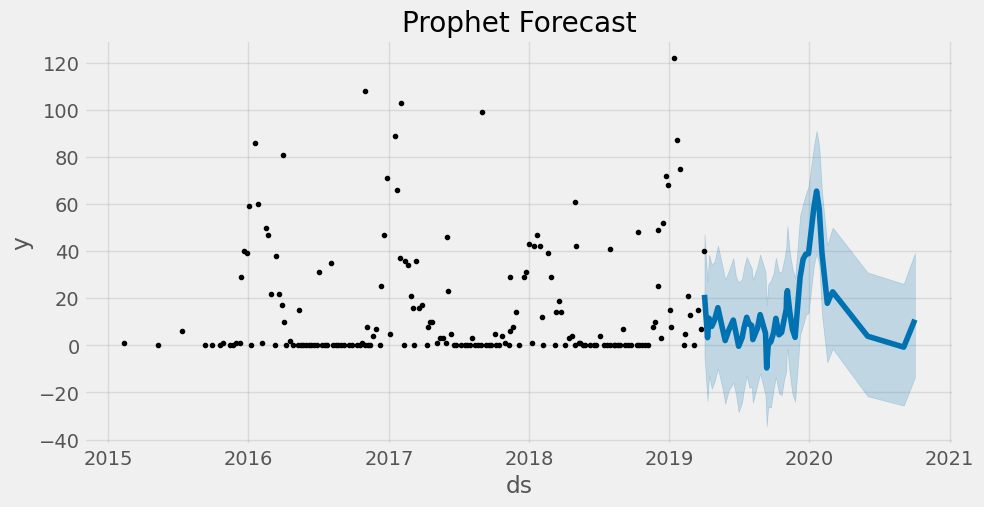

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')

plt.savefig("Prophet_Influneza_AD_Result.png")


plt.show()

In [ ]:
#prediction prophet test train show fig

# Create the plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure and an axis
ax.plot(df.index, df['TEST SET'], label='TEST SET', marker='o', ms=8)
ax.plot(df.index, df['TRAINING SET'], label='TRAINING SET', marker='s', ms=8)
ax.set_title('Influenza')
ax.legend()
# Use Streamlit to display the plot
st.pyplot(fig)

In [2]:
import plotly.graph_objects as go


In [ ]:



        #image = Image.open(r'Needed\Images\XGBOOST_Influneza_Monthly_Analysis_Box_Plot_.png')
        #st.image(image, caption='XGBOOST_Influneza_Monthly_Analysis_Box_Plot')

In [ ]:
# 1. as sidebar menu
with st.sidebar:
    selected = option_menu("Menu", ["Data Analysis","Anomaly Detection", 'Forecasting'], 
        icons=['house', 'gear', 'gear'], menu_icon="cast", default_index=1)
    selected

# 2. horizontal menu
selected2 = option_menu(None, ["Home", "Upload", "Tasks", 'Settings'], 
    icons=['house', 'cloud-upload', "list-task", 'gear'], 
    menu_icon="cast", default_index=0, orientation="horizontal")
selected2

# 3. CSS style definitions
selected3 = option_menu(None, ["Home", "Upload",  "Tasks", 'Settings'], 
    icons=['house', 'cloud-upload', "list-task", 'gear'], 
    menu_icon="cast", default_index=0, orientation="horizontal",
    styles={
        "container": {"padding": "0!important", "background-color": "#fafafa"},
        "icon": {"color": "orange", "font-size": "25px"}, 
        "nav-link": {"font-size": "25px", "text-align": "left", "margin":"0px", "--hover-color": "#eee"},
        "nav-link-selected": {"background-color": "green"},
    }
)

# 4. Manual item selection
if st.session_state.get('switch_button', False):
    st.session_state['menu_option'] = (st.session_state.get('menu_option', 0) + 1) % 4
    manual_select = st.session_state['menu_option']
else:
    manual_select = None
    
selected4 = option_menu(None, ["Home", "Upload", "Tasks", 'Settings'], 
    icons=['house', 'cloud-upload', "list-task", 'gear'], 
    orientation="horizontal", manual_select=manual_select, key='menu_4')
st.button(f"Move to Next {st.session_state.get('menu_option', 1)}", key='switch_button')
selected4

# 5. Add on_change callback
def on_change(key):
    selection = st.session_state[key]
    st.write(f"Selection changed to {selection}")
    
selected5 = option_menu(None, ["Home", "Upload", "Tasks", 'Settings'],
                        icons=['house', 'cloud-upload', "list-task", 'gear'],
                        on_change=on_change, key='menu_5', orientation="horizontal")
selected5


In [ ]:
file1 = r"C:\Users\hacio\OneDrive\Desktop\Project\Docs Needed\No Anomaly\2021_2024.csv"
df1 = load_data(file1)

st.header("Türkiye Influenza Cases 2021-2024")
fig = go.Figure([go.Scatter(x=df1['Week Start Date'], y=df1['Positive'])])
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Influenza cases")
# Use Streamlit to display the graph
st.plotly_chart(fig)

st.header("2021-2024 DataFrame")
#st.write(df)
st.dataframe(df1, use_container_width=True)

fig, ax = plt.subplots()
ax.hist(df["Positive"], bins=20)

st.pyplot(fig)